In [23]:
# displays original fits
# displays colored segmap overlayed with fits
# displays each layer
# https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html#sphx-glr-users-explain-colors-colormap-manipulation-py


In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import random

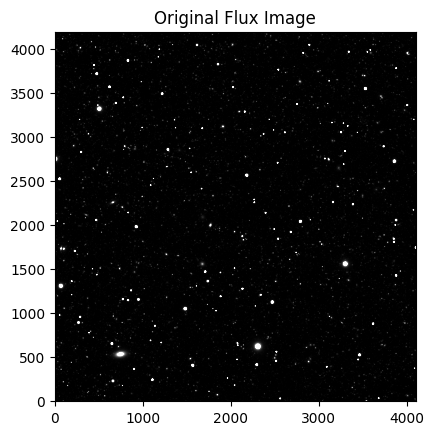

In [2]:
flux_image_hdul = fits.open("retrieved_fits/image0.fits")
flux_image = flux_image_hdul[1].data
plt.imshow(flux_image,vmin=0,vmax=1,cmap='gray', origin='lower');
plt.title("Original Flux Image");

hdul = fits.open("sersic_output/labelled_segmap5.fits")
onion_img = [sum(x) for x in zip(hdul[1].data,hdul[2].data,hdul[3].data,hdul[4].data,hdul[5].data)]

In [ ]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
data_list = [i.data for i in hdul[1:]]      

# for i in range(25,500):
#     for j in range(300,350):
#         data_list[1][i][j] = 4
# for i in range(400,500):
#     for j in range(1340,3000):
#         data_list[2][i][j] = 3
# for i in range(1000,2000):
#     for j in range(789,2424):
#         data_list[4][i][j] = 5
        
        
cmaps = [ListedColormap(["black","darkorange"]),ListedColormap(["black","gold"]),ListedColormap(["black","lawngreen"]),ListedColormap(["black","lightseagreen"]),ListedColormap(["black","red"])]

n = len(cmaps)

fig, axes = plt.subplots(1, n, figsize=(25,5))#, squeeze=False)     

count = 0
for [ax, cmap] in zip(axes.flat, cmaps):
    psm = ax.pcolormesh(data_list[count], cmap=cmap, vmin=0, vmax=count+1) #  rasterized=True
    # fig.colorbar(psm, ax=ax)
    ax.title.set_text(f"Class {count+1}")
    count+=1
plt.show()
        
        
        
cmaps = [ListedColormap(["black","darkorange", "gold", "lawngreen", "lightseagreen","red"])]
data = onion_img 


n = len(cmaps)
fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                        layout='constrained', squeeze=False)

for [ax, cmap] in zip(axs.flat, cmaps):
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=5)
    fig.colorbar(psm, ax=ax)
plt.title("Segmentation Map")
plt.show()
